In [1]:
import pandas as pd
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('modeldata2.csv',index_col='Date_all',parse_dates=True)
data.drop(columns='Profit',inplace=True)
data['bestentry']=data['entrydiff']/np.timedelta64(1, 's') +1
data['bestexit']=data['exitdiff']/np.timedelta64(1, 's') +1
output=data[['Last Price_all','short_window_all','long_window_all','bestentry','bestexit']] # Data for both models
actual=output[-2:]

In [3]:
df=output[:-2] ## Extracting the prediction data from the output dataframe
entrydf=df.drop(columns='bestexit') ## Dataframe for model to predict best entry
exitdf=df.drop(columns='bestentry') ## Dataframe for model to predict best exit

In [4]:
## Model to predict best entry
entrydf

,Last Price_all,short_window_all,long_window_all,bestentry
Date_all,,,,
2022-05-05 20:00:00,1.0543,1.0543,1.054267,1.0
2022-05-05 20:30:00,1.0541,1.0541,1.054250,1801.0
2022-05-05 23:00:00,1.0535,1.0535,1.053167,1.0
2022-05-06 00:00:00,1.0528,1.0528,1.052967,1.0
2022-05-06 00:30:00,1.0532,1.0532,1.053067,1801.0
...,...,...,...,...
2022-09-27 11:30:00,0.9615,0.9615,0.961467,1.0
2022-09-27 12:00:00,0.9590,0.9590,0.960950,1801.0
2022-09-27 14:30:00,0.9599,0.9599,0.958667,1.0


In [5]:
entryx=entrydf.drop(columns='bestentry') ## X
entryY=entrydf['bestentry'] ## Y

In [6]:
## Checking which kernel is the best
lin_svr_entry = SVR(kernel='linear',C=1000.0) ## Linear
lin_svr_entry.fit(entryx,entryY)

poly_svr_entry = SVR(kernel='poly',C=1000.0,degree=2) ## Polynomial
poly_svr_entry.fit(entryx,entryY)

rbf_svr_entry=SVR(kernel='rbf',C=1000.0,gamma=0.15) ## RBF
rbf_svr_entry.fit(entryx,entryY)

SVR(C=1000.0, gamma=0.15)

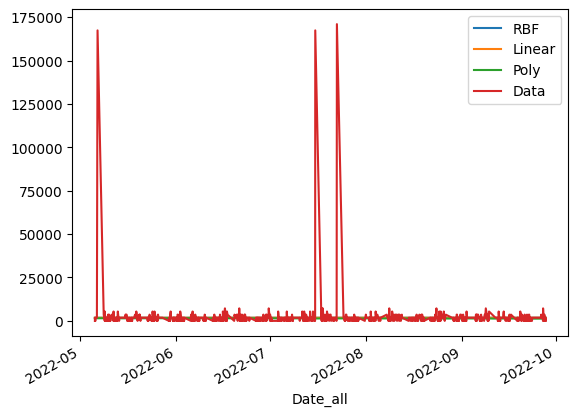

In [7]:
## Plot for best entry across all kernels and the original data
plt.plot(entrydf.index,rbf_svr_entry.predict(entryx),label="RBF")
plt.plot(entrydf.index,lin_svr_entry.predict(entryx),label="Linear")
plt.plot(entrydf.index,poly_svr_entry.predict(entryx),label='Poly')
entrydf['bestentry'].plot(label="Data")
plt.legend()

In [8]:
display(float(rbf_svr_entry.predict(actual.iloc[:-1,:3])),float(lin_svr_entry.predict(actual.iloc[:-1,:3])),float(poly_svr_entry.predict(actual.iloc[:-1,:3])))
display(actual.iloc[:1,3:4])

1800.9012393815915

1800.9003145718866

1281.7857524550025

,bestentry
Date_all,
2022-09-27 20:30:00,1801.0


In [9]:
## RBF and Linear are the closest to 1801, we could use RBF for best entry

In [10]:
## Model to predict best exit
exitdf

,Last Price_all,short_window_all,long_window_all,bestexit
Date_all,,,,
2022-05-05 20:00:00,1.0543,1.0543,1.054267,1.0
2022-05-05 20:30:00,1.0541,1.0541,1.054250,3601.0
2022-05-05 23:00:00,1.0535,1.0535,1.053167,1.0
2022-05-06 00:00:00,1.0528,1.0528,1.052967,1.0
2022-05-06 00:30:00,1.0532,1.0532,1.053067,1801.0
...,...,...,...,...
2022-09-27 11:30:00,0.9615,0.9615,0.961467,1.0
2022-09-27 12:00:00,0.9590,0.9590,0.960950,1801.0
2022-09-27 14:30:00,0.9599,0.9599,0.958667,1.0


In [11]:
exitx = exitdf.drop(columns='bestexit') ## X
exitY = exitdf['bestexit'] ## Y

In [37]:
## Checking which kernel is the best
lin_svr_exit = SVR(kernel='linear', C=1000.0) ## Linear
lin_svr_exit.fit(exitx, exitY)

poly_svr_exit = SVR(kernel='poly', C=1000.0, degree=2) ## Polynomial
poly_svr_exit.fit(exitx, exitY)

rbf_svr_exit = SVR(kernel='rbf', C=1000.0, gamma=0.15) ## RBF
rbf_svr_exit.fit(exitx, exitY)

SVR(C=1000.0, gamma=0.15)

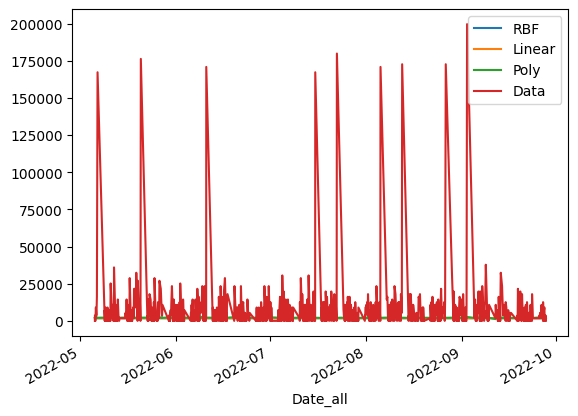

In [38]:
## Plot for best entry across all kernels and the original data
plt.plot(exitdf.index, rbf_svr_exit.predict(exitx), label="RBF")
plt.plot(exitdf.index, lin_svr_exit.predict(exitx), label="Linear")
plt.plot(exitdf.index, poly_svr_exit.predict(exitx), label='Poly')
exitdf['bestexit'].plot(label="Data")
plt.legend()

In [39]:
display(float(rbf_svr_exit.predict(actual.iloc[:-1, :3])), float(lin_svr_exit.predict(actual.iloc[:-1, :3])), float(poly_svr_exit.predict(actual.iloc[:-1, :3])), actual.iloc[:-1, 4:])

1801.1022196062313

1801.1046645660497

2281.721510164689

,bestexit
Date_all,
2022-09-27 20:30:00,7201.0


In [36]:
## Poly is the closest to 7201, we use this for best exit